Emmanuel Johnson<br>
Professor Curry<br>
CPS 493 Image Processing<br>
04/04/2023<br>
In Class Project - Assignment 3<br>

### Sobel Pipeline with Noise Reduction

<ol>

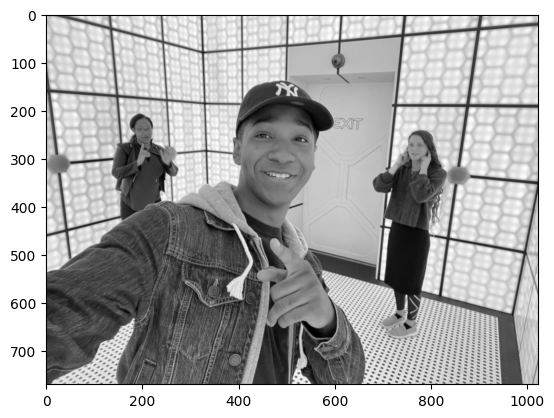

In [11]:
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
from numpy import interp

#1. Import Image & Grayscle Conversion
img = cv2.imread('mephoto2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')


Text(0.5, 1.0, 'Gaussian Filter')

<Figure size 1500x1500 with 0 Axes>

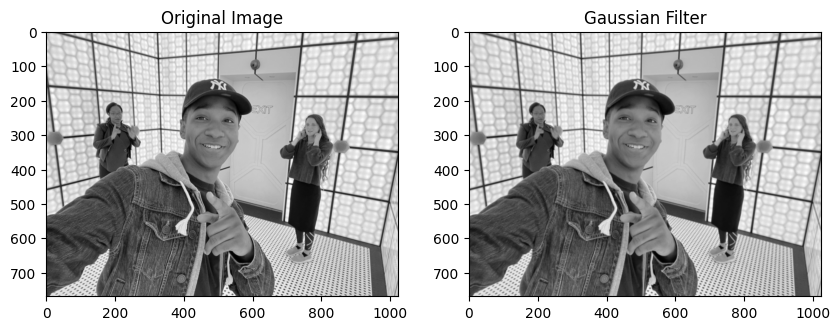

In [13]:
#2. Noise Reduction: Gaussian filter 
gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float32) / 16

# Convolve with the image
imgGaussian = cv2.filter2D(img, -1, gaussian_filter)

# Plot the combined image
fig = plt.figure(figsize = (15,15))

# Convolve with the image
imgGaussian = cv2.filter2D(img, -1, gaussian_filter)

# Plot size
fig  = plt.figure(figsize = (10,10))

# Create subplots

# Left Image
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1,2,2)
plt.imshow(imgGaussian, cmap='gray')
plt.title('Gaussian Filter')

<Figure size 1500x1500 with 0 Axes>

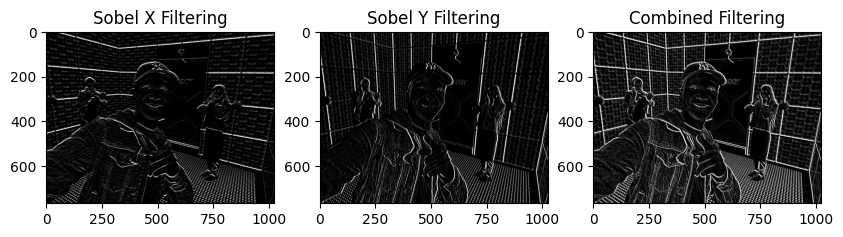

<Figure size 1000x1000 with 0 Axes>

In [102]:
#3. Horizontal and Vertical Sobel Filtering
kernelX = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
kernelY = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

dx = cv2.Sobel(imgGaussian, cv2.CV_32F, 1, 0)  # float 
dy = cv2.Sobel(imgGaussian, cv2.CV_32F, 0, 1)

#convolution
imgSobelX = cv2.filter2D(imgGaussian, -1, kernelX)
imgSobelY = cv2.filter2D(imgGaussian, -1, kernelY)

#Plot the combined image
fig = plt.figure(figsize=(15, 15))

imgSobelXY = cv2.add(imgSobelX, imgSobelY)

fig = plt.figure(figsize=(10, 10))

# Create subplots
# Left Image
fig.add_subplot(1,3,1)
plt.imshow(imgSobelX, cmap='gray')
plt.title('Sobel X Filtering')

# Center Image
fig.add_subplot(1,3,2)
plt.imshow(imgSobelY, cmap='gray')
plt.title('Sobel Y Filtering')

# Right image
fig.add_subplot(1,3,3)
plt.imshow(imgSobelXY, cmap='gray')
plt.title('Combined Filtering')
fig = plt.figure(figsize = (10,10))

Text(0.5, 1.0, 'Magnitude')

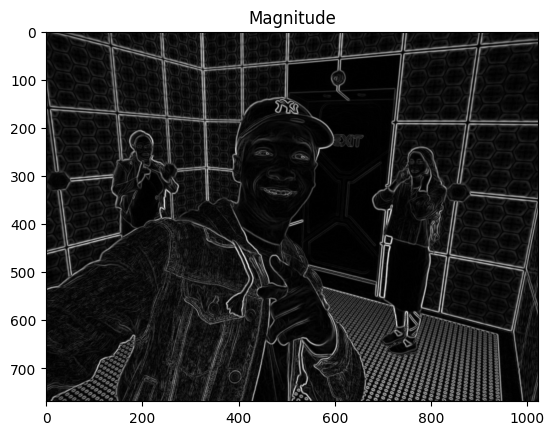

In [106]:

#4. Sobel Magnitude Calculation
mag = cv2.magnitude(dx,dy)
plt.imshow(mag,cmap='gray')
plt.title('Magnitude')

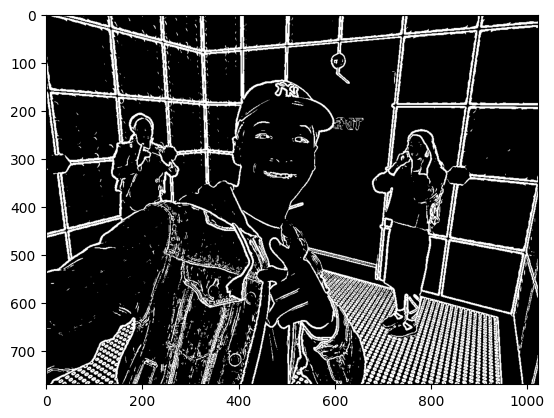

In [115]:
#5. Thresholding

th, imgOcvThres = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
plt.imshow(imgOcvThres,cmap="gray")
